In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def copySides(image, nw, row, col):
  
  for r in range(row):
    nw[r, col:col+image.shape[1]] = image[0,]
  
  for r in range(row+image.shape[0], 2*row+image.shape[0]):
    nw[r, col:col+image.shape[1]] = image[image.shape[0]-1,]
  
  for c in range(col):
    nw[row:row+image.shape[0], c] = image[:,0]
  
  for c in range(col+image.shape[1], 2*col+image.shape[1]):
    nw[row:row+image.shape[0], c] = image[:,image.shape[1]-1]
  
  return nw

def filtering(image, mask):
  shift_row = mask.shape[0]//2
  shift_col = mask.shape[1]//2
  
  new_image = np.zeros((image.shape[0]+2*shift_row,
                        image.shape[1]+2*shift_col), np.float32)
  
  new_image[shift_row:shift_row+image.shape[0], shift_col:shift_col+image.shape[1]] = image
  new_image = copySides(image, new_image, shift_row, shift_col)
  
  plt.figure(figsize=(4, 4))
  plt.axis("off")
  plt.imshow(new_image, cmap="gray")
  plt.show()
  
  result = np.zeros(new_image.shape, np.float32)
  
  # Filtrado
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col, image.shape[1]+shift_col):
      aux = new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      result[i,j] = np.sum(aux*mask)
  
  return result[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]

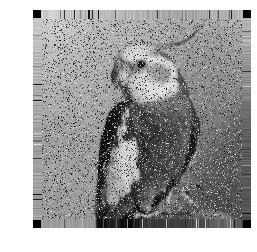

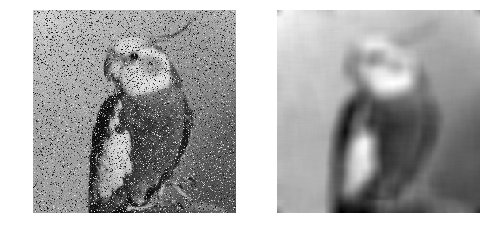

In [0]:
img = cv2.imread("lorito.jpg", 0)

size = 21
mask = (1/(size*size))*np.ones((size, size))

res = filtering(img, mask)

plt.figure(figsize=(8, 8))

plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img, cmap="gray")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(res, cmap="gray")
plt.show()